In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Data Analysis**

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sentiment distribution')

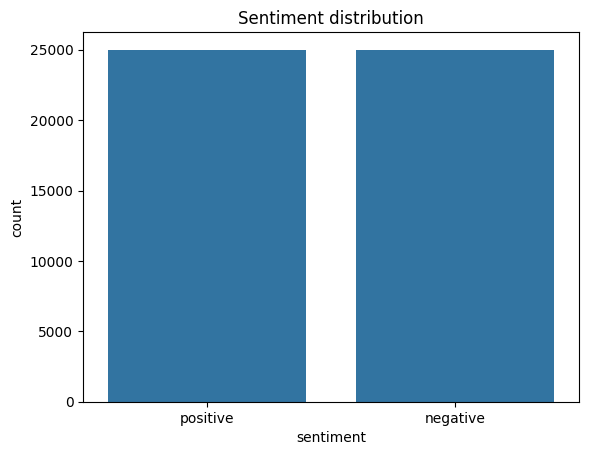

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [ ]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [ ]:
df['word count'] = df['review'].apply(no_of_words)

In [ ]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


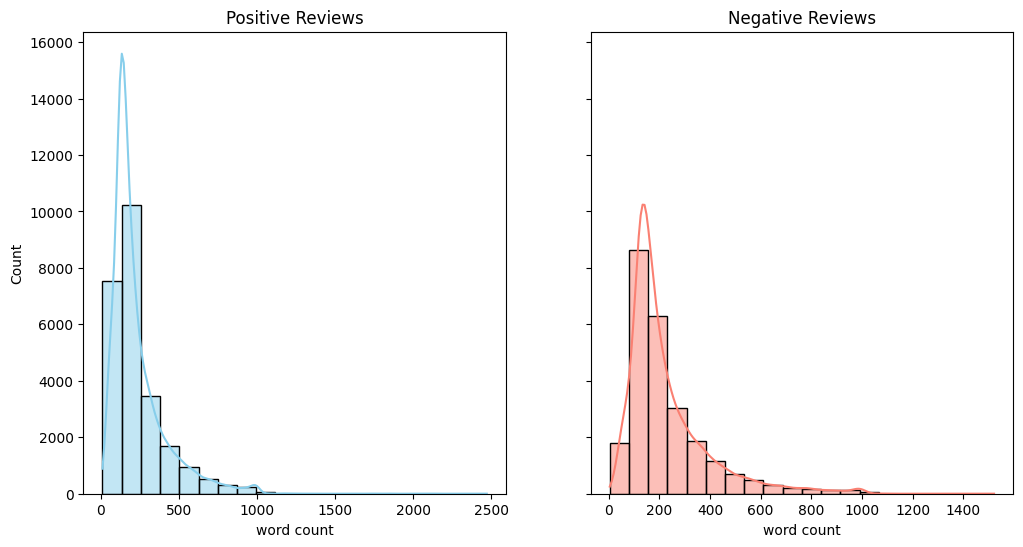

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.histplot(df[df['sentiment'] == 'positive']['word count'], bins=20, color='skyblue', ax=axes[0], kde=True)
axes[0].set_title("Positive Reviews")

sns.histplot(df[df['sentiment'] == 'negative']['word count'], bins=20, color='salmon', ax=axes[1], kde=True)
axes[1].set_title("Negative Reviews")

plt.show()

In [ ]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

<ipython-input-4-9f58b8f1475c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sentiment.replace("positive", 1, inplace=True)
<ipython-input-4-9f58b8f1475c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


**Data Preprocessing**

In [ ]:
def preprocess_text(text):

    # Lowercasing sentence
    sentence = text.lower()

    # remove url
    pattern1 = re.compile(r'https?://\S+|www\.\S+')
    sentence = pattern1.sub('', sentence)

    # Removing html tags
    pattern2 = re.compile('<.*?>')
    sentence = pattern2.sub('', sentence)

    # Removing punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Removing single character
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

df['review'] = df['review'].apply(preprocess_text)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was wonderful way to spend time...,1
3,basically there a family where little boy jake...,0
4,petter mattei love in the time of money is vis...,1


In [ ]:
x=df['review'].values
y=df['sentiment'].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(40000,)

In [ ]:
Y_test.shape

(10000,)

In [ ]:
tf_idf = TfidfVectorizer()
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)

**Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, Y_train)
logreg_pred = logreg.predict(X_test_tfidf)
logreg_f1 = f1_score(Y_test, logreg_pred, average='weighted')
print("F1 Score: {:.2f}".format(logreg_f1))

F1 Score: 0.90


In [ ]:
print(confusion_matrix(Y_test, logreg_pred))
print("\n")
print(classification_report(Y_test, logreg_pred))

[[4591  448]
 [ 563 4398]]


              precision    recall  f1-score   support

           1       0.89      0.91      0.90      5039
           2       0.91      0.89      0.90      4961

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



**Multinomial Naive Bayes**

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, Y_train)
mnb_pred = mnb.predict(X_test_tfidf)
mnb_f1 = f1_score(Y_test, mnb_pred, average='weighted')
print("F1 Score: {:.2f}".format(mnb_f1))

F1 Score: 0.86


In [ ]:
print(confusion_matrix(Y_test, mnb_pred))
print("\n")
print(classification_report(Y_test, mnb_pred))

[[4229  810]
 [ 544 4417]]


              precision    recall  f1-score   support

           1       0.89      0.84      0.86      5039
           2       0.85      0.89      0.87      4961

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



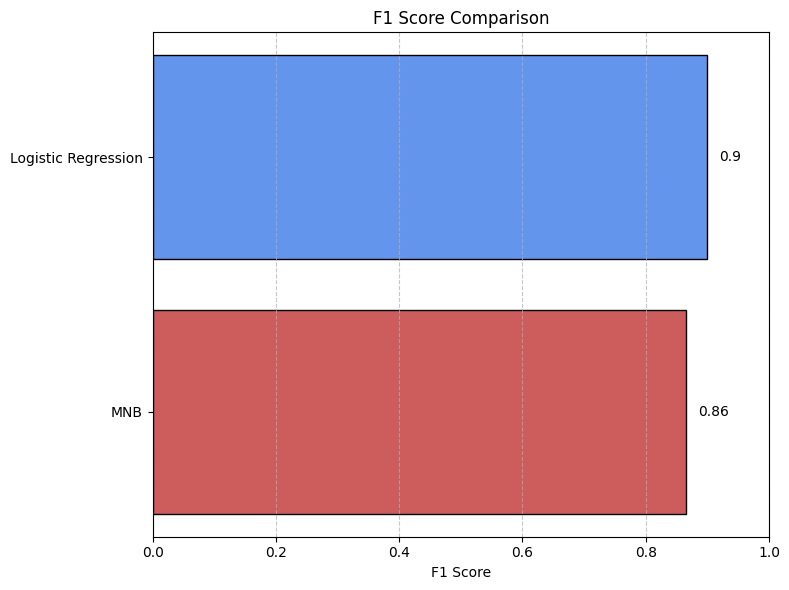

In [ ]:

models = ['MNB', 'Logistic Regression']
f1_scores = [mnb_f1, logreg_f1]
colors = ['indianred', 'cornflowerblue']

fig, ax = plt.subplots(figsize=(8, 6))

# Plot bar chart
ax.barh(models, f1_scores, color=colors, edgecolor='black')
ax.set_xlim(0, 1)
ax.set_xlabel('F1 Score')
ax.set_title('F1 Score Comparison')
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels on the bars
for i, score in enumerate(f1_scores):
    ax.text(score + 0.02, i, f"{round(score, 2)}", va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


**Embedding Layer**

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras_preprocessing

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Activation,Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_length = len(tokenizer.word_index)+1
vocab_length

92442

In [ ]:
maxlen = 100

x_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
glove_file = open("glove.6B.100d.txt", encoding = 'utf8')
embeddings_dictionary = dict()
for line in glove_file:
    records = line.split()
    words = records[0]
    vector_dimensions = np.asarray(records[1:], dtype = 'float32')
    embeddings_dictionary[words] = vector_dimensions
glove_file.close()

In [ ]:
print(list(tokenizer.word_index.items())[:15])

[('the', 1), ('and', 2), ('of', 3), ('to', 4), ('is', 5), ('it', 6), ('in', 7), ('this', 8), ('that', 9), ('was', 10), ('as', 11), ('movie', 12), ('for', 13), ('with', 14), ('but', 15)]


In [ ]:
embeddings_dictionary.get('film')

array([ 0.19916 , -0.049702,  0.24579 , -0.32281 ,  0.89768 , -0.1278  ,
       -0.49506 ,  0.20814 , -0.20046 , -0.20604 ,  0.038292, -0.67277 ,
       -0.12689 , -0.18766 , -0.10277 ,  0.73128 ,  0.82408 ,  0.087288,
        0.69255 ,  1.3107  ,  0.49113 , -0.38097 ,  0.24338 , -0.27813 ,
        0.62506 ,  0.35978 ,  0.42041 , -0.24529 ,  0.14861 , -0.26726 ,
       -0.56262 ,  0.63843 , -0.54153 ,  0.36537 ,  0.20545 , -0.16604 ,
        0.72434 ,  0.29961 , -0.42501 , -0.35932 , -0.089288,  0.48752 ,
       -1.0927  ,  0.88818 ,  0.89941 , -0.7541  , -0.35492 , -0.76396 ,
        0.27468 ,  0.2757  , -0.48152 , -0.41399 ,  0.64489 ,  1.148   ,
       -0.29131 , -2.9387  , -0.83162 ,  0.95586 ,  1.1623  , -0.42502 ,
        0.15486 ,  2.2326  , -0.31339 , -0.030228,  0.79802 , -0.41302 ,
        0.72885 ,  0.7296  , -0.31909 ,  0.8956  ,  0.34625 ,  0.2923  ,
        0.40056 ,  0.78985 , -0.43999 ,  0.24698 , -0.46548 ,  0.055886,
       -0.62603 , -0.036487, -0.65429 ,  0.10563 , 

In [ ]:
embedding_matrix = np.zeros((vocab_length, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(92442, 100)

**LSTM:**

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix],input_length=maxlen,  trainable = False)
model.add(embedding_layer)
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       9,244,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,244,200 (35.26 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,244,200 (35.26 MB)

None


In [ ]:
model_history = model.fit(x_train, Y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)

Epoch 1/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 68s 116ms/step - acc: 0.6799 - loss: 0.5880 - val_acc: 0.7880 - val_loss: 0.4445
Epoch 2/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 83s 118ms/step - acc: 0.7925 - loss: 0.4437 - val_acc: 0.8207 - val_loss: 0.4081
Epoch 3/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 81s 116ms/step - acc: 0.8216 - loss: 0.3917 - val_acc: 0.8300 - val_loss: 0.3653
Epoch 4/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - acc: 0.8373 - loss: 0.3580 - val_acc: 0.8388 - val_loss: 0.3627
Epoch 5/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - acc: 0.8545 - loss: 0.3385 - val_acc: 0.8432 - val_loss: 0.3517
Epoch 6/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 83s 116ms/step - acc: 0.8629 - loss: 0.3175 - val_acc: 0.8470 - val_loss: 0.3409
Epoch 7/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 83s 118ms/step - acc: 0.8732 - loss: 0.2966 - val_acc: 0.8555 - val_loss: 0.3309
Epoch 8/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 80s 114ms/step - acc: 0.8800 - loss: 0.2797 - val_acc: 0.8525 - val_loss: 0.3287
Epoch 9/15
563/563 ━━━━━━━━━━━━━

In [ ]:
lstm_result = model.evaluate(x_test,Y_test, verbose = 1)
print("Test Accuracy:", lstm_result[1])
print("Test Loss:", lstm_result[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - acc: 0.8552 - loss: 0.3780
Test Accuracy: 0.8568999767303467
Test Loss: 0.37036019563674927


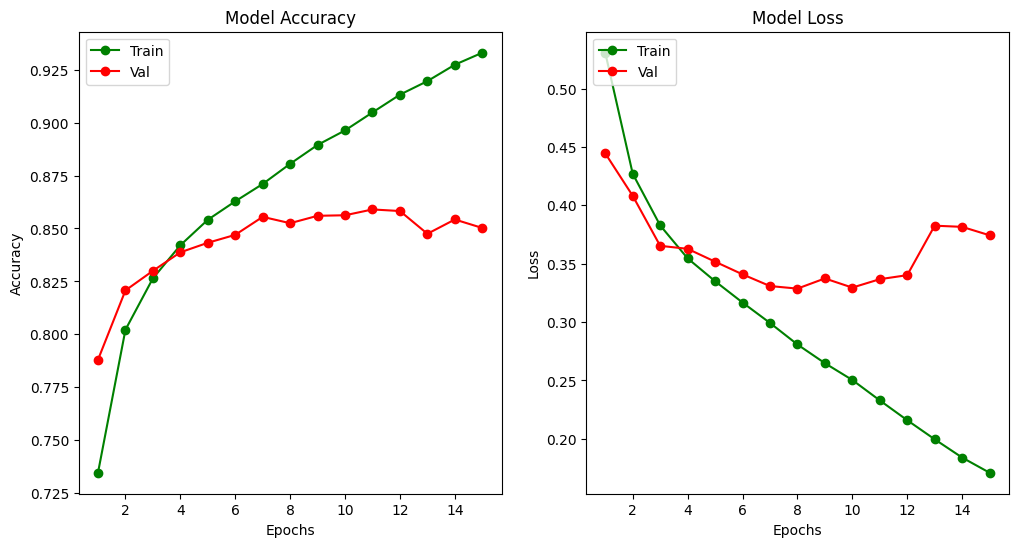

In [ ]:
plt.figure(figsize=(12,6))
epochs = range(1, 16)
plt.subplot(1,2,1)
plt.plot(epochs,model_history.history['acc'],color = 'green', marker = 'o')
plt.plot(epochs,model_history.history['val_acc'],color = 'red', marker = 'o')
plt.title("Model Accuracy")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Accuracy",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,model_history.history["loss"],color = 'green', marker = 'o')
plt.plot(epochs,model_history.history["val_loss"],color = 'red', marker = 'o')
plt.title("Model Loss")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Loss",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
model.save("sentiment_classifier.keras")

**Simple Neural Network**

In [ ]:
snn = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
snn.add(embedding_layer)
snn.add(Flatten())
snn.add(Dense(16, activation='relu'))
snn.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
snn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
snn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       9,244,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,244,200 (35.26 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,244,200 (35.26 MB)

In [ ]:
history_snn = snn.fit(x_train,Y_train, batch_size=128, epochs = 15,
                      verbose=1, validation_split =0.2)

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4944 - loss: 0.7102 - val_accuracy: 0.5000 - val_loss: 0.6819
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6493 - loss: 0.6499 - val_accuracy: 0.7344 - val_loss: 0.5946
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7611 - loss: 0.5467 - val_accuracy: 0.7418 - val_loss: 0.5215
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7954 - loss: 0.4516 - val_accuracy: 0.7479 - val_loss: 0.5203
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8152 - loss: 0.4130 - val_accuracy: 0.7495 - val_loss: 0.5255
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8275 - loss: 0.3931 - val_accuracy: 0.7321 - val_loss: 0.5815
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8299 - loss: 0.3774 - val_accuracy: 0.7437 - val_loss: 0.5515
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8368 - loss: 0.3676 - val_accur

In [ ]:
result = snn.evaluate(x_test,Y_test, verbose = 1)
print("Test Accuracy:", result[1])
print("Test Loss:", result[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7101 - loss: 0.6644
Test Accuracy: 0.7172999978065491
Test Loss: 0.6573495268821716


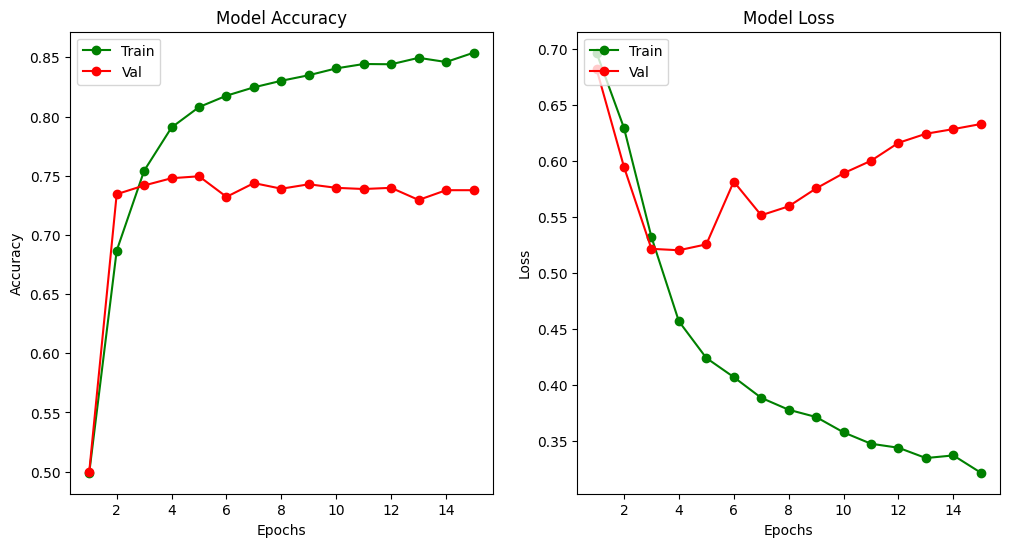

In [ ]:
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history_snn.history["accuracy"],color = 'green', marker = 'o')
plt.plot(epochs,history_snn.history["val_accuracy"],color = 'red', marker = 'o')
plt.title("Model Accuracy")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Accuracy",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history_snn.history["loss"],color = 'green', marker = 'o')
plt.plot(epochs,history_snn.history["val_loss"],color = 'red', marker = 'o')
plt.title("Model Loss")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Loss",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.show()